# Outlier detection

## Interquartile range

## Standard deviation - Z score

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [47]:
df = pd.read_csv('CarPrice_Assignment.csv')

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<AxesSubplot:xlabel='price'>

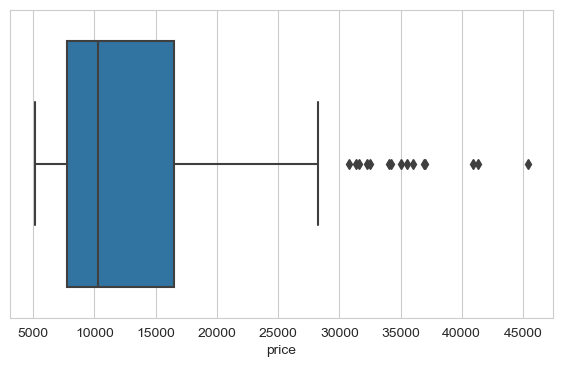

In [48]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='price')

C:\Users\elnur\anaconda3\envs\Production-Enhancement-Dashboard\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

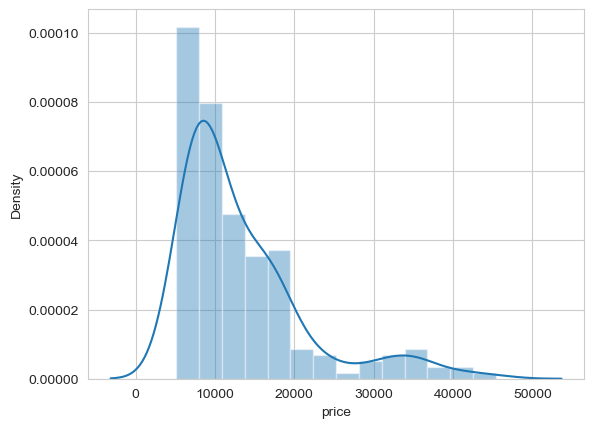

In [49]:
sns.distplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='horsepower'>

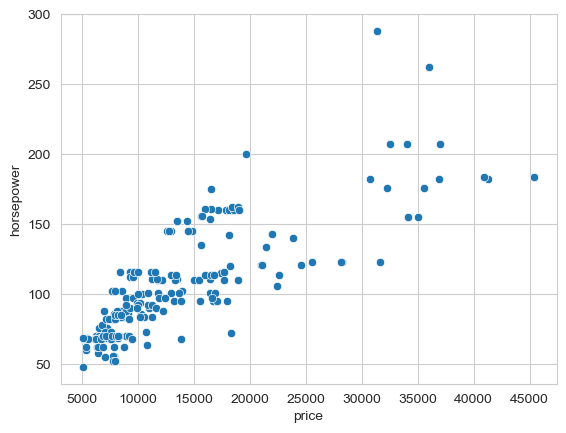

In [50]:
sns.scatterplot(data=df, x='price', y='horsepower')

In [51]:
df['price_log'] = np.log(df['price'])
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_log
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,9.510075
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,9.711116
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,9.711116
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,9.543235
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,9.767095


<AxesSubplot:xlabel='price_log', ylabel='horsepower'>

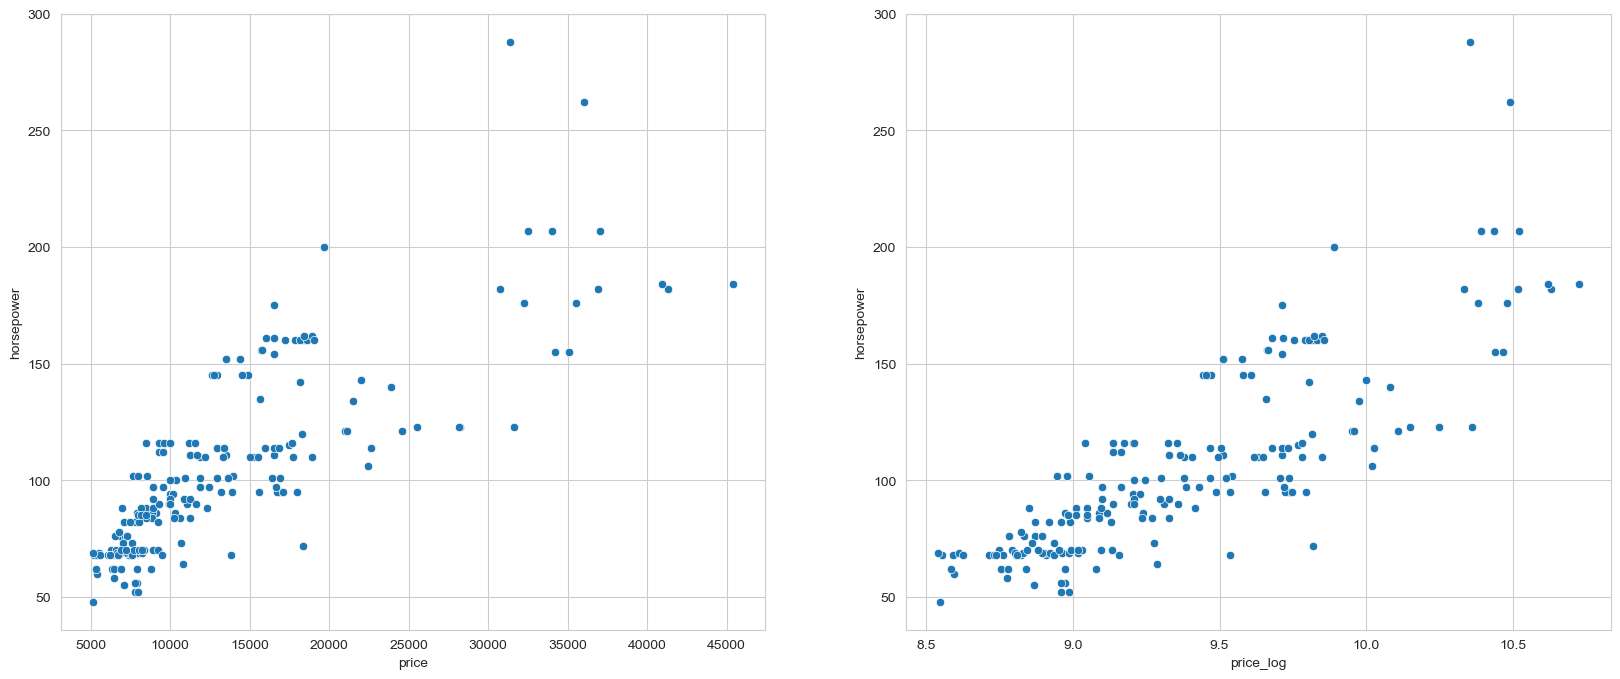

In [52]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='price', y='horsepower')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='price_log', y='horsepower')


In [53]:
df.corr()['horsepower']

car_ID             -0.015006
symboling           0.070873
wheelbase           0.353294
carlength           0.552623
carwidth            0.640732
carheight          -0.108802
curbweight          0.750739
enginesize          0.809769
boreratio           0.573677
stroke              0.080940
compressionratio   -0.204326
horsepower          1.000000
peakrpm             0.131073
citympg            -0.801456
highwaympg         -0.770544
price               0.808139
price_log           0.825835
Name: horsepower, dtype: float64

C:\Users\elnur\anaconda3\envs\Production-Enhancement-Dashboard\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

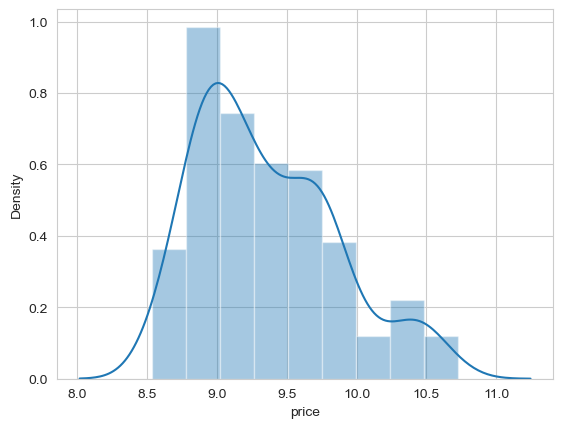

In [54]:
sns.distplot(np.log(df['price']))

In [55]:
df['price'].max()

45400.0

In [56]:
def out_std(df, column, shift_amount=3):

    # mean = df[column].mean()
    mean = np.median(df[column])
    std = df[column].std()

    cutt_off = std * shift_amount

    lower = mean - cutt_off
    upper = mean + cutt_off

    print(f'The lower limit is {lower}')
    print(f'The upper limit is {upper}')

    fig = plt.figure(figsize=(8,6))
    sns.distplot(df[column],kde=False)
    plt.axvspan(xmin=lower, xmax=df[column].min(), alpha=0.2, color='red')
    plt.axvspan(xmin=upper, xmax=df[column].max(), alpha=0.2, color='red')
    plt.show()

    df = df[df[column]>lower]
    df = df[df[column]<upper]

    return df


<AxesSubplot:xlabel='price_log'>

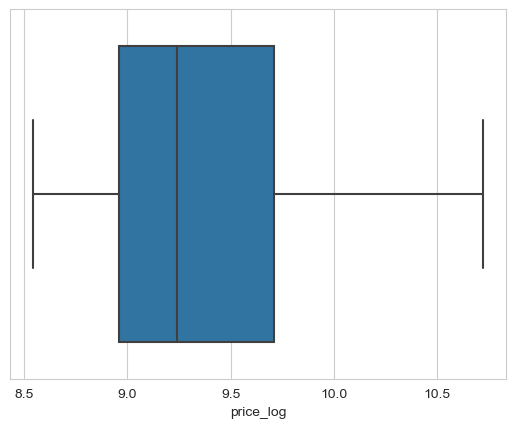

In [57]:
sns.boxplot(data=df, x='price_log')

The lower limit is 7.727997987879902
The upper limit is 10.750829251043879


C:\Users\elnur\anaconda3\envs\Production-Enhancement-Dashboard\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


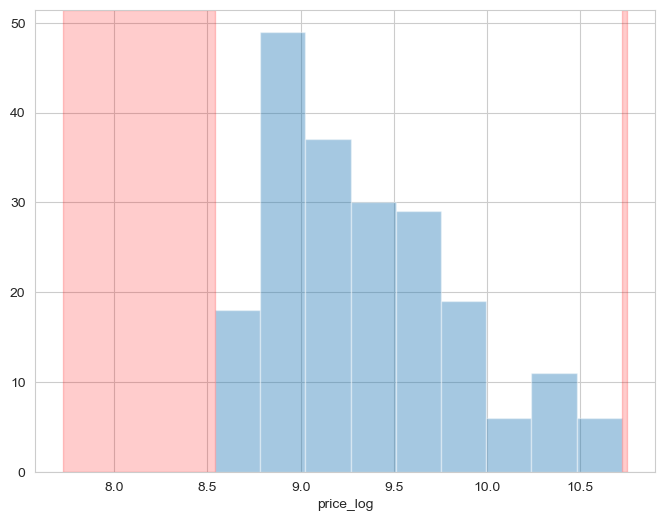

In [58]:
df = out_std(df, 'price_log')

The lower limit is -5682.7046634863
The upper limit is 26272.7046634863


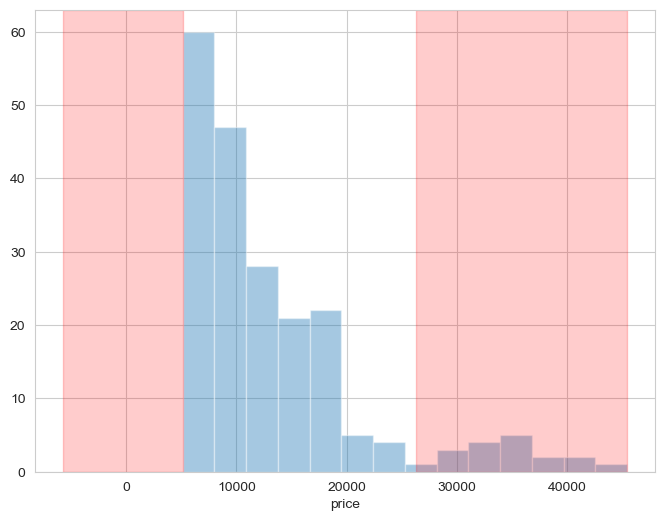

In [59]:
df = out_std(df, 'price', shift_amount=2)

C:\Users\elnur\anaconda3\envs\Production-Enhancement-Dashboard\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_log', ylabel='Density'>

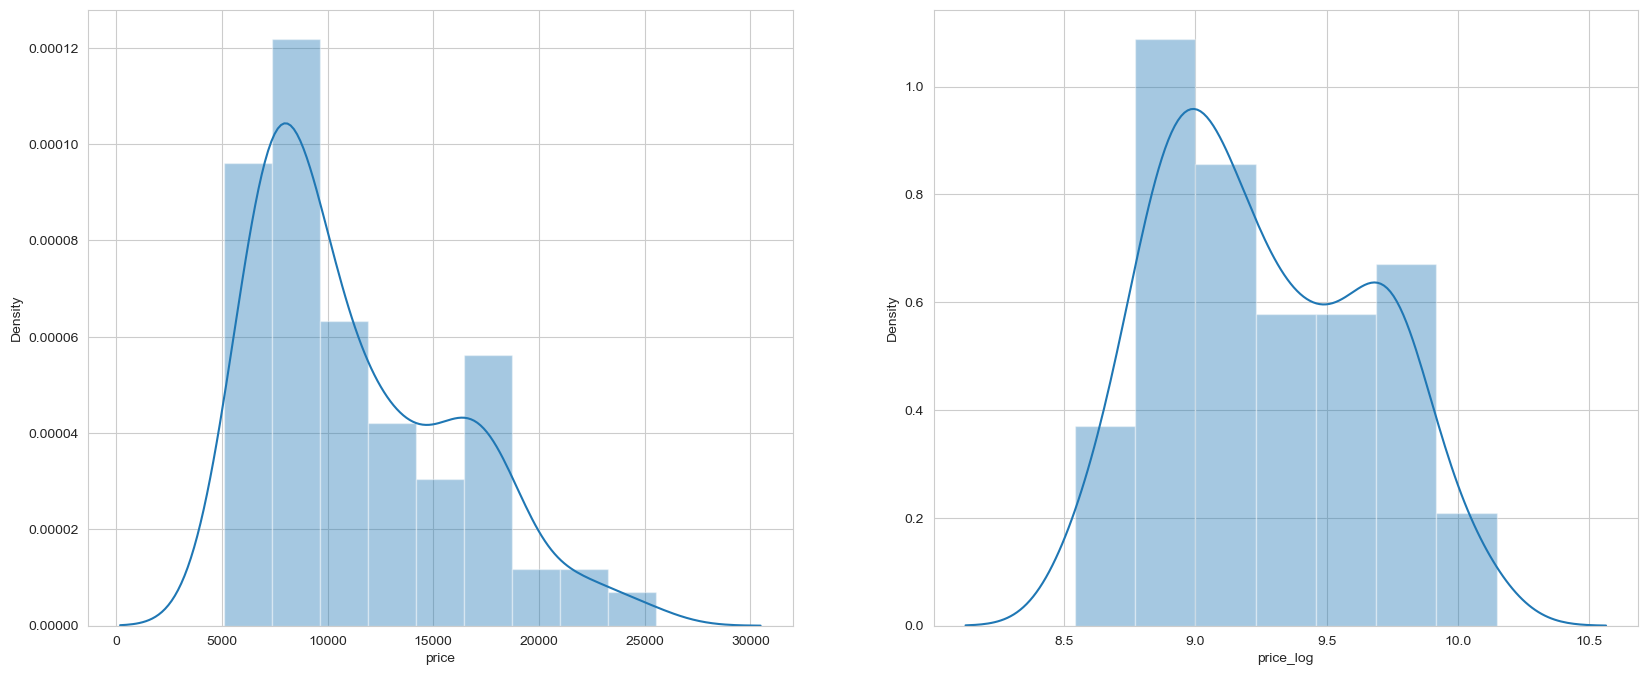

In [60]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['price'])
plt.subplot(1,2,2)
sns.distplot(df['price_log'])


In [61]:
df['price'].max()

25552.0

In [62]:
df.corr()['horsepower']

car_ID              0.087534
symboling           0.086894
wheelbase           0.369008
carlength           0.559713
carwidth            0.603288
carheight          -0.052138
curbweight          0.740524
enginesize          0.762257
boreratio           0.492303
stroke              0.130759
compressionratio   -0.272767
horsepower          1.000000
peakrpm             0.133068
citympg            -0.812663
highwaympg         -0.800860
price               0.746000
price_log           0.770643
Name: horsepower, dtype: float64

<AxesSubplot:xlabel='compressionratio'>

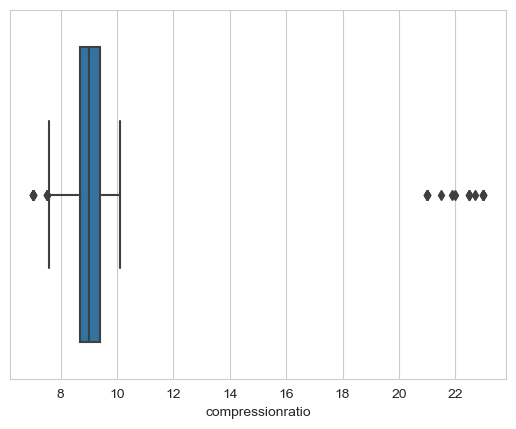

In [63]:
sns.boxplot(data=df, x='compressionratio')

C:\Users\elnur\anaconda3\envs\Production-Enhancement-Dashboard\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compressionratio', ylabel='Density'>

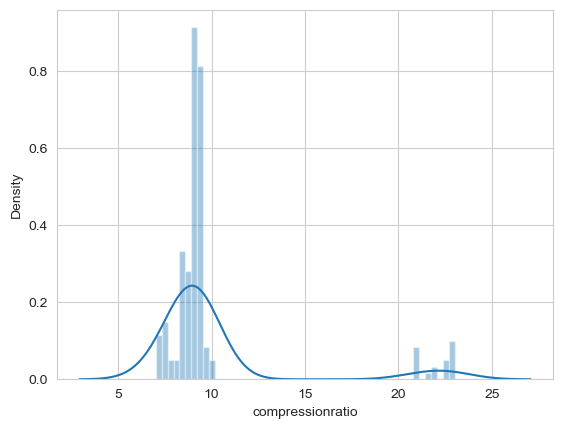

In [64]:
sns.distplot(df['compressionratio'])

In [65]:
df.corr()['price']


car_ID              0.045307
symboling          -0.096508
wheelbase           0.652122
carlength           0.731277
carwidth            0.774570
carheight           0.225958
curbweight          0.843003
enginesize          0.730507
boreratio           0.494913
stroke              0.035950
compressionratio    0.093315
horsepower          0.746000
peakrpm            -0.083492
citympg            -0.691979
highwaympg         -0.696985
price               1.000000
price_log           0.981781
Name: price, dtype: float64

The lower limit is -2.586156175701692
The upper limit is 20.586156175701692


C:\Users\elnur\anaconda3\envs\Production-Enhancement-Dashboard\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


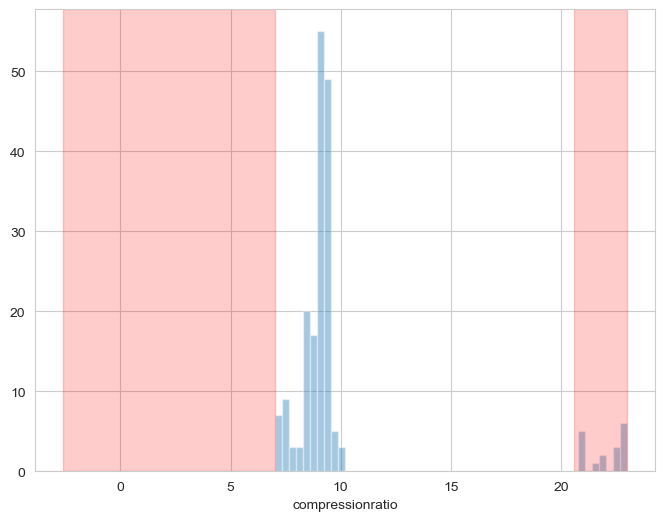

In [66]:
df = out_std(df, 'compressionratio', 3)

In [67]:
df.corr()['price']

car_ID              0.055826
symboling          -0.025516
wheelbase           0.624239
carlength           0.725792
carwidth            0.758239
carheight           0.181450
curbweight          0.841300
enginesize          0.713839
boreratio           0.496413
stroke             -0.019263
compressionratio   -0.257233
horsepower          0.799978
peakrpm             0.009840
citympg            -0.770612
highwaympg         -0.759965
price               1.000000
price_log           0.982444
Name: price, dtype: float64

## Z score

In [68]:
# z_score = (x - mean)/std

NameError: name 'x' is not defined

## Isolation Forest

In [85]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [86]:
from sklearn.ensemble import IsolationForest

In [115]:
iso = IsolationForest(contamination=0.05)

In [116]:
outliers = iso.fit_predict(df['price'].to_numpy().reshape(-1,1))

In [117]:
df[outliers==-1]['price']

14     24565.0
15     30760.0
16     41315.0
17     36880.0
49     36000.0
67     25552.0
68     28248.0
69     28176.0
73     40960.0
74     45400.0
128    37028.0
Name: price, dtype: float64

C:\Users\elnur\anaconda3\envs\Production-Enhancement-Dashboard\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\elnur\anaconda3\envs\Production-Enhancement-Dashboard\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

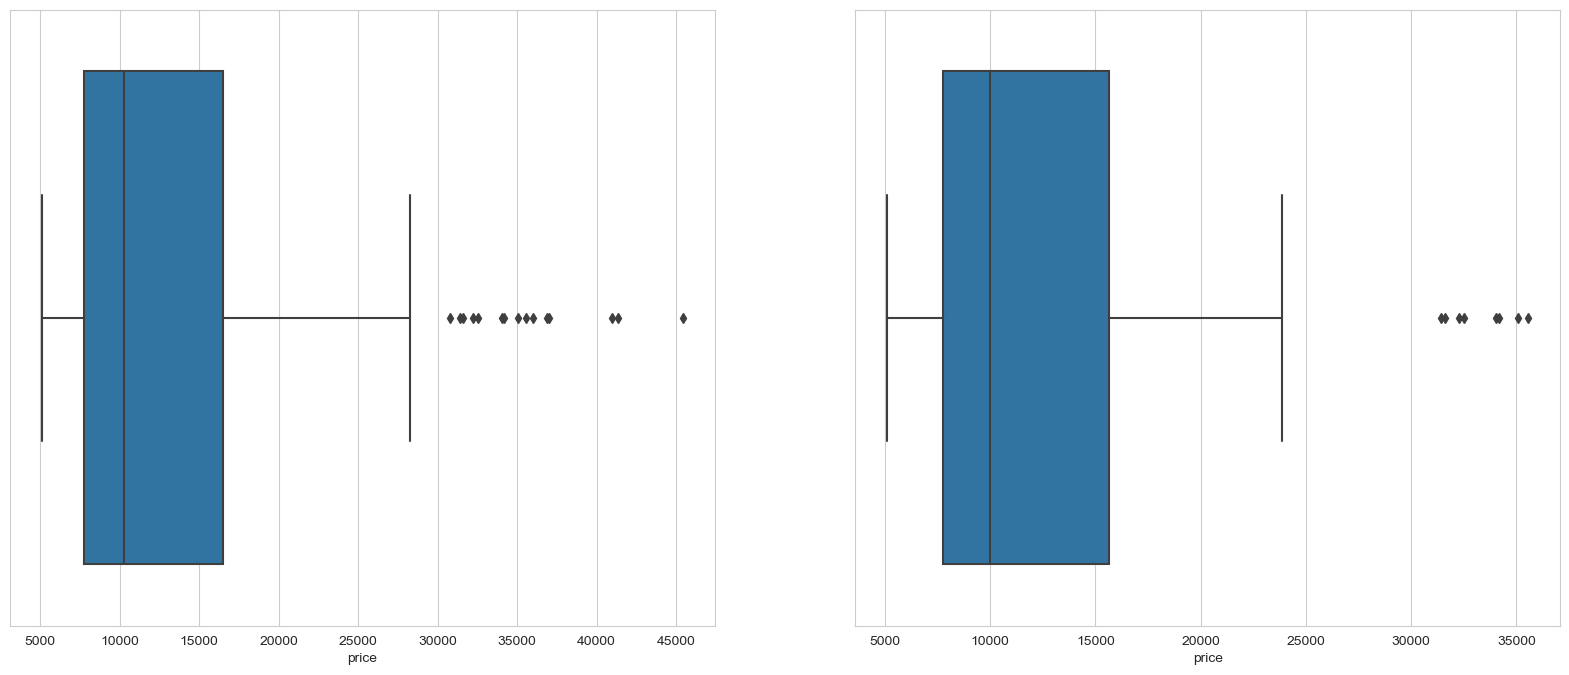

In [118]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(df['price'])
plt.subplot(1,2,2)
sns.boxplot(df[outliers==1]['price'])

C:\Users\elnur\anaconda3\envs\Production-Enhancement-Dashboard\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

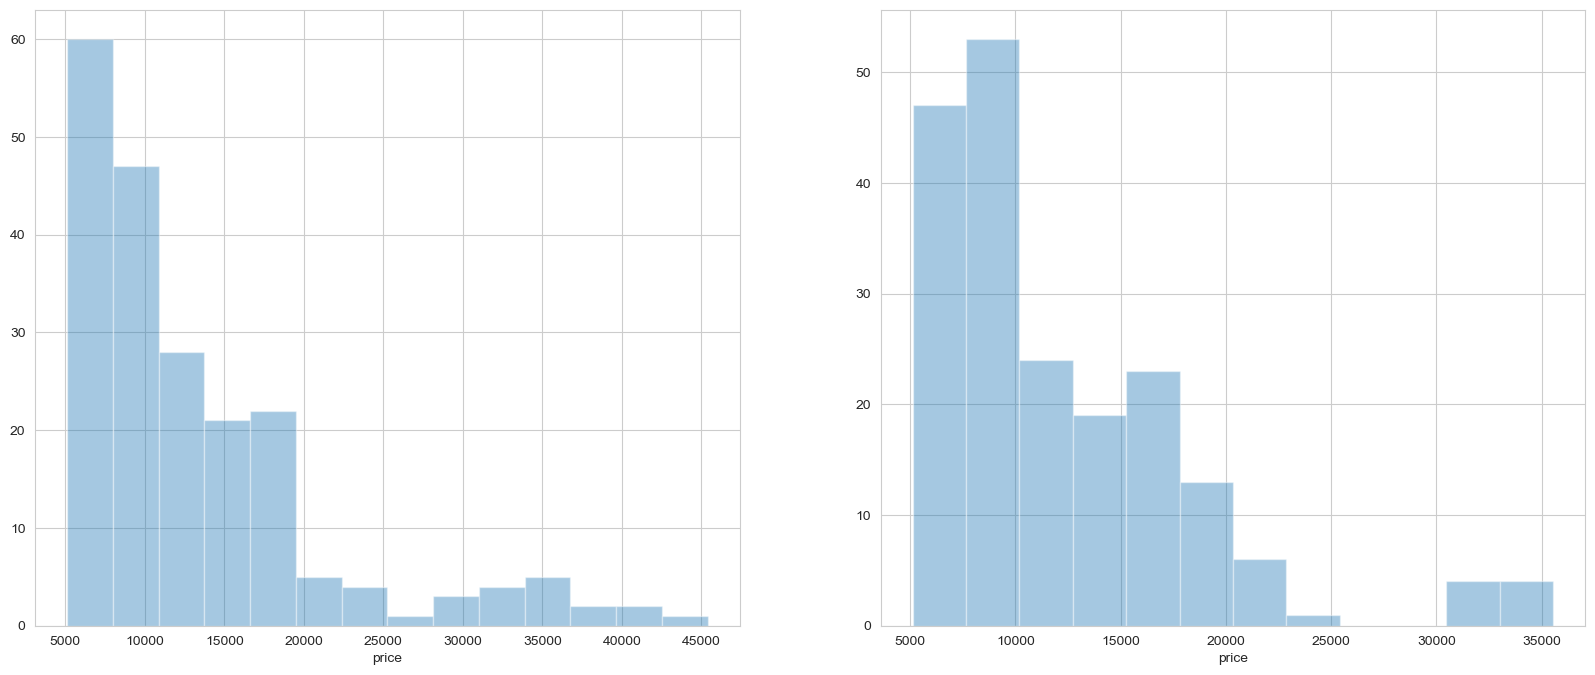

In [119]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['price'], kde=False)
plt.subplot(1,2,2)
sns.distplot(df[outliers==1]['price'], kde=False)

In [111]:
df.corr()['price']

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [112]:
df[outliers==1].corr()['price']


car_ID             -0.020930
symboling          -0.114767
wheelbase           0.621401
carlength           0.704592
carwidth            0.781380
carheight           0.091640
curbweight          0.854346
enginesize          0.827712
boreratio           0.509675
stroke              0.073909
compressionratio    0.062626
horsepower          0.797194
peakrpm            -0.071747
citympg            -0.684279
highwaympg         -0.685470
price               1.000000
Name: price, dtype: float64

In [113]:
iso_2 = IsolationForest()

outliers_2 = iso_2.fit_predict(df['price'].to_numpy().reshape(-1,1))

outliers_2

array([ 1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1])

C:\Users\elnur\anaconda3\envs\Production-Enhancement-Dashboard\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compressionratio'>

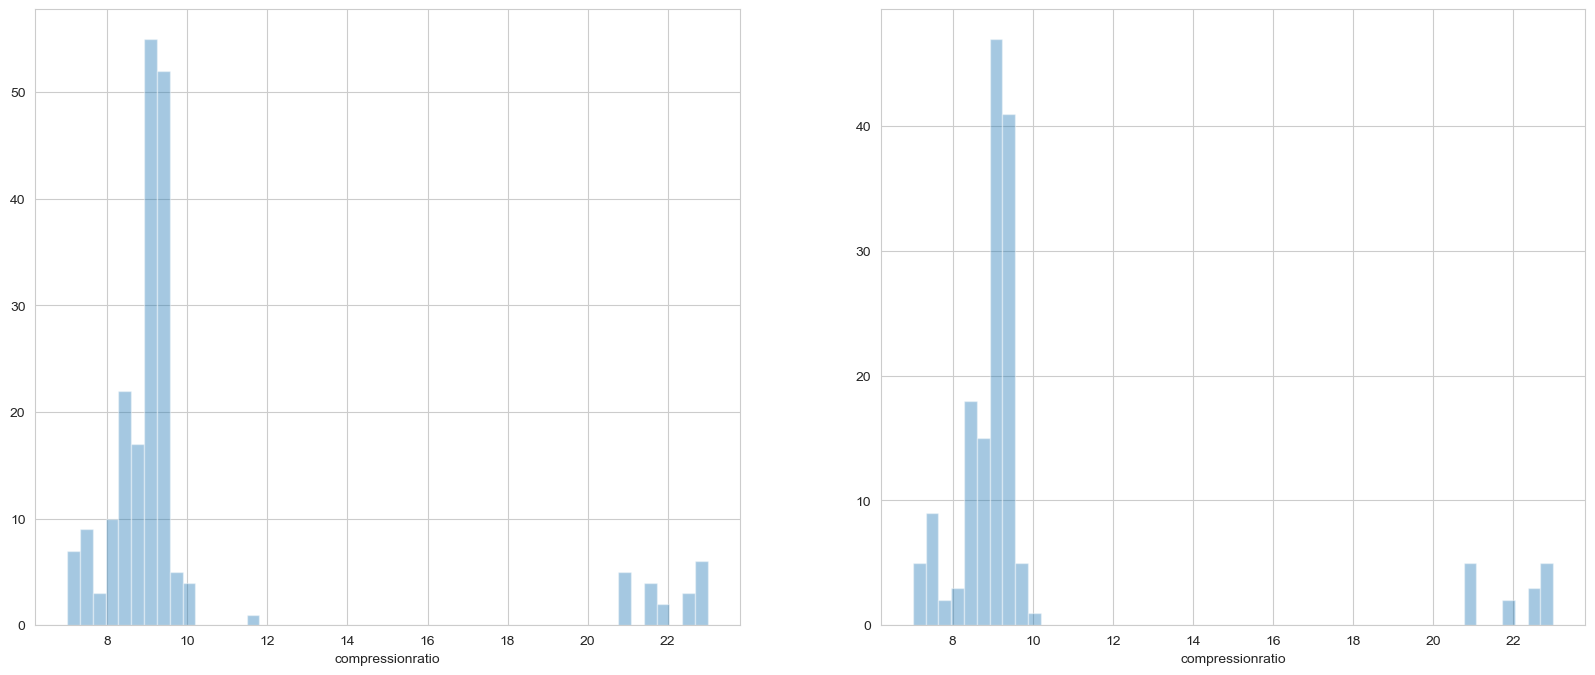

In [114]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['compressionratio'], kde=False)
plt.subplot(1,2,2)
sns.distplot(df[outliers_2==1]['compressionratio'], kde=False)

In [135]:
x = np.arange(1, 101)

y = x.copy()

for i in range(10):
    random_eded = np.random.randint(0,101)

    y[random_eded] = y[random_eded] + np.random.randint(-40,41)

In [136]:
y

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,   9,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  69,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  29,  51,  52,
        53,  54,  55,  56,  57,  58,  52,  60,  61,  62,  63,  90,  65,
        66,  67,  68,  47,  70,  71,  88,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  45, 118,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

C:\Users\elnur\anaconda3\envs\Production-Enhancement-Dashboard\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

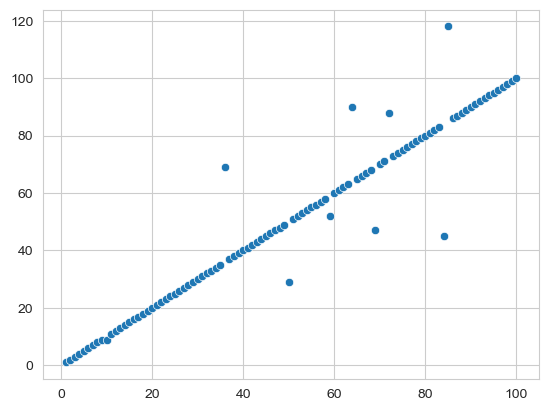

In [137]:
sns.scatterplot(x,y)

## Isolation forest 2d

In [138]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [154]:
pd.DataFrame(df.corr()['price']).sort_values('price')

,price
highwaympg,-0.697599
citympg,-0.685751
car_ID,-0.109093
peakrpm,-0.085267
symboling,-0.079978
compressionratio,0.067984
stroke,0.079443
carheight,0.119336
boreratio,0.553173
wheelbase,0.577816


<AxesSubplot:>

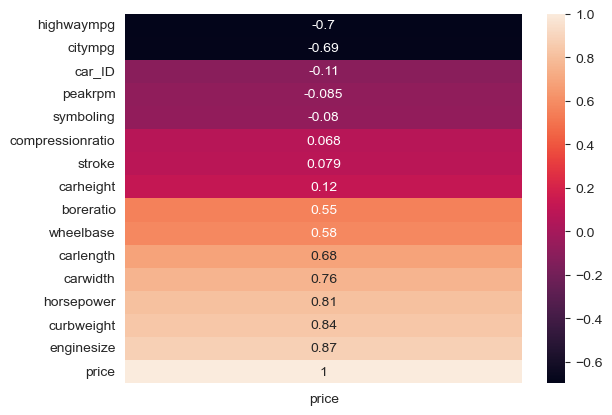

In [155]:
sns.heatmap(pd.DataFrame(df.corr()['price']).sort_values('price'), annot=True)

<AxesSubplot:xlabel='enginesize', ylabel='price'>

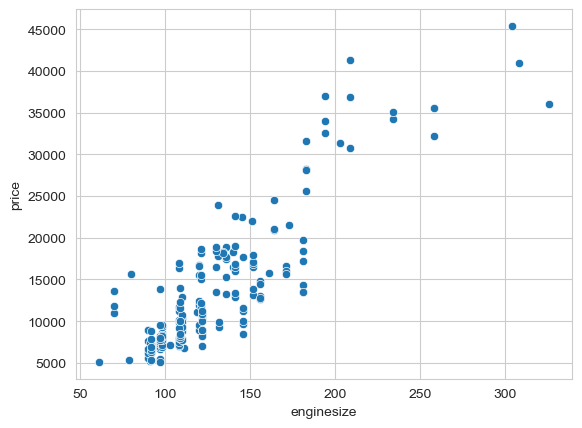

In [156]:
sns.scatterplot(data=df, x='enginesize', y='price')

<AxesSubplot:xlabel='horsepower', ylabel='price'>

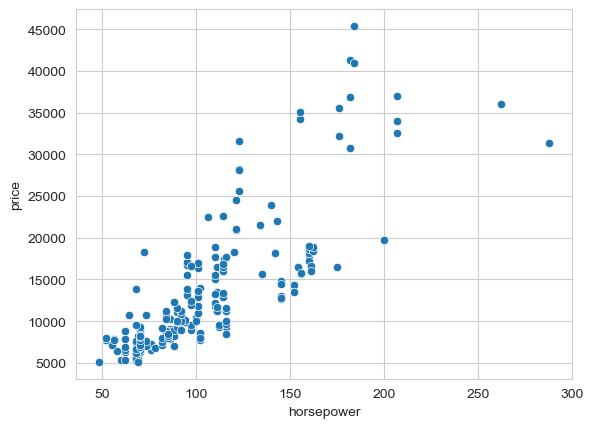

In [157]:
sns.scatterplot(data=df, x='horsepower', y='price')


In [176]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=.015)

In [177]:
outliers = iso.fit_predict(df['price'].to_numpy().reshape(-1,1), df['horsepower'])

In [178]:
outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1])

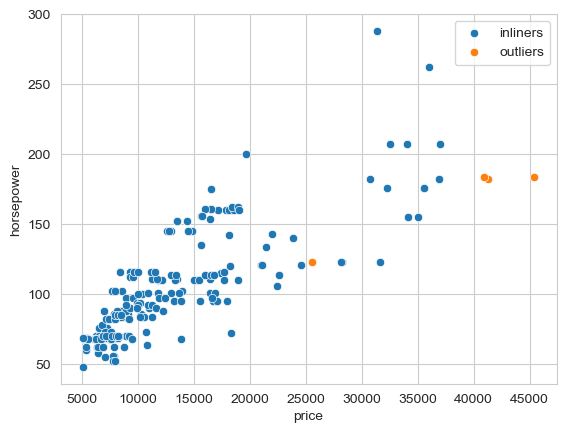

In [179]:
sns.scatterplot(x=df[outliers==1]['price'], y=df[outliers==1]['horsepower'], label='inliners')
sns.scatterplot(x=df[outliers==-1]['price'], y=df[outliers==-1]['horsepower'], label='outliers')
plt.legend()


<AxesSubplot:xlabel='compressionratio', ylabel='price'>

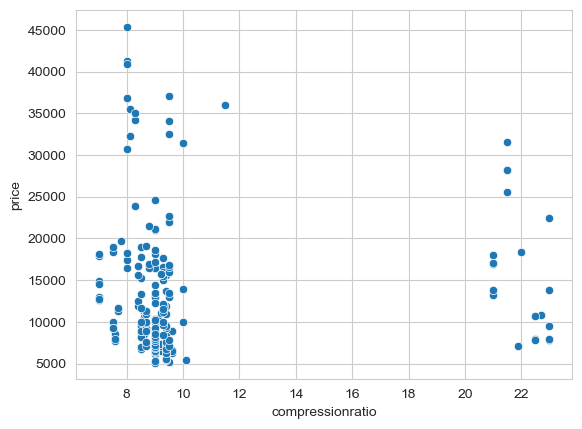

In [180]:
sns.scatterplot(x=df['compressionratio'], y=df['price'])

<AxesSubplot:xlabel='fueltype', ylabel='compressionratio'>

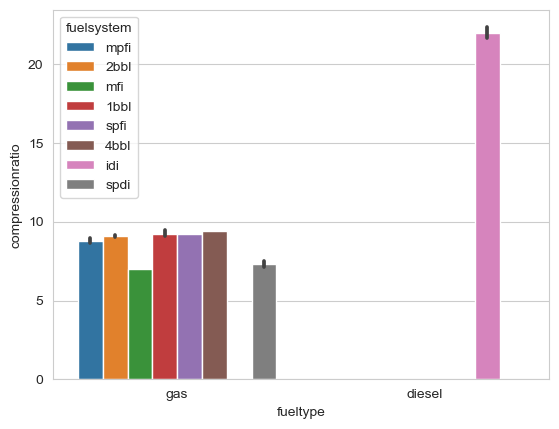

In [182]:
sns.barplot(data=df, x='fueltype', y='compressionratio', hue='fuelsystem')

In [ ]:
def out_std(df, column, shift_amount=3):

    # mean = df[column].mean()
    mean = np.median(df[column])
    std = df[column].std()

    cutt_off = std * shift_amount

    lower = mean - cutt_off
    upper = mean + cutt_off

    print(f'The lower limit is {lower}')
    print(f'The upper limit is {upper}')

    fig = plt.figure(figsize=(8,6))
    sns.distplot(df[column],kde=False)
    plt.axvspan(xmin=lower, xmax=df[column].min(), alpha=0.2, color='red')
    plt.axvspan(xmin=upper, xmax=df[column].max(), alpha=0.2, color='red')
    plt.show()

    df = df[df[column]>lower]
    df = df[df[column]<upper]

    return df


y = k1x1 + k2x2 + k3x3

In [183]:
from sklearn.impute import SimpleImputer